In [1]:
import construction as cs
import matplotlib.pyplot as plt

### read font
from matplotlib import font_manager

font_dirs = ['Barlow/']
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)

for font_file in font_files:
    font_manager.fontManager.addfont(font_file)

# set font
plt.rcParams['font.family'] = 'Barlow'

import networkx as nx
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

%load_ext autoreload
%autoreload 2

# Load generated graphs

In [2]:
def load_origin_graph(file_name,gap=299):
    data_in = cs.load_data("../Datasets/"+file_name+".dat")
    gap = 299 
    graphs_in = cs.build_graphs(data_in,gap=gap)
    return graphs_in

def load_ETNgen_graph(file_name):
    path = "../Generated_graphs/Multiple_run/"+file_name+"/"
    gap = 299 
    graphs = []
    for i in os.listdir(path):
        data_in = cs.load_data(path+i)
        graphs_in = cs.build_graphs(data_in,gap=gap)
        graphs.append(graphs_in)
    return graphs


def load_dym_graph(file_name):
    path = "../Competitors_generated_graphs/Dymond/Multiple_run/"+file_name+"/"
    gap = 0 
    graphs = []
    for i in os.listdir(path):
        print(path+i)
        data_in = cs.load_data(path+i)
        graphs_in = cs.build_graphs(data_in,gap=gap)
        graphs.append(graphs_in)
    return graphs

def load_stm_graph(file_name):
    path = "../Competitors_generated_graphs/STM/Multiple_run/"+file_name+"/"
    gap = 0 
    graphs = []
    for i in os.listdir(path):
        print(path+i)
        data_in = cs.load_data(path+i)
        graphs_in = cs.build_graphs(data_in,gap=gap)
        graphs.append(graphs_in)
    return graphs

def load_tag_graph(file_name):
    path = "../Competitors_generated_graphs/TagGen/Multiple_run/"+file_name+"/"
    gap = 0 
    graphs = []
    for i in os.listdir(path):
        print(path+i)
        data_in = cs.load_data(path+i)
        graphs_in = cs.build_graphs(data_in,gap=gap)
        graphs.append(graphs_in)
    return graphs

In [3]:
import networkx as nx
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

from topological_metrics import *

import os

# Compute and store topological stuff

# number of communities

In [ ]:
file_name = "InVS13"

ori = load_origin_graph(file_name)
etn_gen = load_ETNgen_graph(file_name)
dym_gen = load_dym_graph(file_name)
stm_gen = load_stm_graph(file_name)
tag_gen = load_tag_graph(file_name)

In [ ]:
# original
nb_conn_comp = []
for g in ori:
    nb_conn_comp.append(len([len(x) for x in list(nx.connected_components(g)) if len(x)>1]))
    
np.save("topology_results/original_distributions/"+file_name+"/con_comp.npy",np.array([nb_conn_comp]))

print(len(nb_conn_comp))

In [ ]:
# etm gen
nb_conn_comp = []
for graphs in etn_gen:
    tmp = []
    for g in graphs:
        tmp.append(len([len(x) for x in list(nx.connected_components(g)) if len(x)>1]))
    nb_conn_comp.append(tmp[:3283])
    
for i in nb_conn_comp:
    print(len(i))
np.save("topology_results/etngen/Multiple_run/distributions/"+file_name+"/con_comp.npy",nb_conn_comp)

In [ ]:
# tag gen
nb_conn_comp = []
for graphs in tag_gen:
    tmp = []
    for g in graphs:
        tmp.append(len([len(x) for x in list(nx.connected_components(g)) if len(x)>1]))
    nb_conn_comp.append(tmp[:3289])
    
for i in nb_conn_comp:
    print(len(i))
np.save("topology_results/taggen/Multiple_run/distributions/"+file_name+"/con_comp.npy",nb_conn_comp)

In [ ]:
# stm gen
nb_conn_comp = []
for graphs in stm_gen:
    tmp = []
    for g in graphs:
        tmp.append(len([len(x) for x in list(nx.connected_components(g)) if len(x)>1]))
    nb_conn_comp.append(tmp[:2274])
    
for i in nb_conn_comp:
    print(len(i))
np.save("topology_results/stmgen/Multiple_run/distributions/"+file_name+"/con_comp.npy",nb_conn_comp)


In [ ]:
# dym gen
nb_conn_comp = []
for graphs in dym_gen:
    tmp = []
    for g in graphs:
        tmp.append(len([len(x) for x in list(nx.connected_components(g)) if len(x)>1]))
    nb_conn_comp.append(tmp[:1154])
    
for i in nb_conn_comp:
    print(len(i))    
np.save("topology_results/dymgen/Multiple_run/distributions/"+file_name+"/con_comp.npy",nb_conn_comp)

# motifs aggregated graph

In [4]:
import networkx as nx
import itertools 

def count_subgraphs(graph, subgraph):
    count = 0
    for i in itertools.combinations(list(graph.nodes()), len(list(subgraph.nodes()))):
        sub_g = nx.subgraph(graph,i)
        
        if nx.is_isomorphic(sub_g, subgraph):
            count += 1
    return count

In [5]:

from networkx.algorithms import isomorphism


def count_subgraphs2(graph, subgraph):
    
    count = 0
    
    GM = isomorphism.GraphMatcher(graph, subgraph)
    c = 0 
    for i in GM.subgraph_isomorphisms_iter():
        c = c +1 
    
    return c




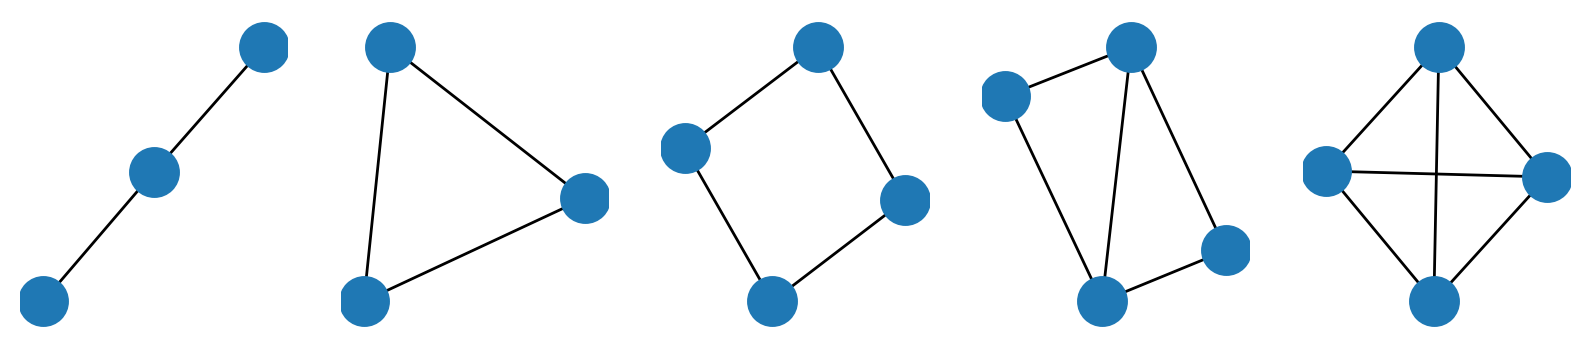

In [6]:
motifs = {"s1":nx.Graph([(1,2),(2,3)]),
         "s2":nx.Graph([(1,2),(2,3),(3,1)]),
         "s3":nx.Graph([(1,2),(2,3),(3,4),(4,1)]),
         "s4":nx.Graph([(1,2),(2,3),(3,4),(4,1),(2,4)]),
         "s5":nx.Graph([(1,2),(2,3),(3,4),(4,1),(2,4),(1,3)])}

c = 1
plt.figure(figsize=(10,2))
for k,v in motifs.items():
    plt.subplot(1,5,c)
    nx.draw(v)
    c = c + 1

# load agg graph

In [7]:
file_name = "InVS13"

ori = load_origin_graph(file_name)
etn_gen = load_ETNgen_graph(file_name)
dym_gen = load_dym_graph(file_name)
stm_gen = load_stm_graph(file_name)
tag_gen = load_tag_graph(file_name)

../Competitors_generated_graphs/Dymond/Multiple_run/InVS13/InVS13_dym7.dat
../Competitors_generated_graphs/Dymond/Multiple_run/InVS13/InVS13_dym8.dat
../Competitors_generated_graphs/Dymond/Multiple_run/InVS13/InVS13_dym4.dat
../Competitors_generated_graphs/Dymond/Multiple_run/InVS13/InVS13_dym6.dat
../Competitors_generated_graphs/Dymond/Multiple_run/InVS13/InVS13_dym1.dat
../Competitors_generated_graphs/Dymond/Multiple_run/InVS13/InVS13_dym5.dat
../Competitors_generated_graphs/Dymond/Multiple_run/InVS13/InVS13_dym2.dat
../Competitors_generated_graphs/Dymond/Multiple_run/InVS13/InVS13_dym3.dat
../Competitors_generated_graphs/Dymond/Multiple_run/InVS13/InVS13_dym9.dat
../Competitors_generated_graphs/Dymond/Multiple_run/InVS13/InVS13_dym0.dat
../Competitors_generated_graphs/STM/Multiple_run/InVS13/InVS13_STM_3.dat
../Competitors_generated_graphs/STM/Multiple_run/InVS13/InVS13_STM_7.dat
../Competitors_generated_graphs/STM/Multiple_run/InVS13/InVS13_STM_9.dat
../Competitors_generated_graphs

In [8]:
G_ori = nx.Graph()

for g in ori:
    for e in g.edges():
        G_ori.add_edge(e[0],e[1])
nx.density(G_ori),len(G_ori)

(0.18036311514572384, 92)

In [9]:
graph = G_ori

In [10]:
%%time
occs = {"s1":[],
         "s2":[],
         "s3":[],
         "s4":[],
         "s5":[]}

for k,subgraph in motifs.items():
    occurrences = count_subgraphs2(graph, subgraph)
    print(k,occurrences)
    occs[k].append(occurrences)

s1 18034
s2 10512
s3 31976
s4 38204
s5 47520
CPU times: user 26.4 s, sys: 0 ns, total: 26.4 s
Wall time: 26.4 s


In [13]:
for k,v in occs.items():
    print(k,np.mean(v))

s1 18034.0
s2 10512.0
s3 31976.0
s4 38204.0
s5 47520.0


In [12]:
#etn 
counts = {"s1":[],
         "s2":[],
         "s3":[],
         "s4":[],
         "s5":[]}

for G in etn_gen[0:2]:
    G_ori = nx.Graph()

    for g in G:
        for e in g.edges():
            G_ori.add_edge(e[0],e[1])    
    graph = G_ori
    for k,subgraph in motifs.items():
        occurrences = count_subgraphs2(graph, subgraph)
        counts[k].append(occurrences)
    print("done")
import json
with open("topology_results/etngen/Multiple_run/distributions/"+file_name+"/motifs.json", "w") as file:
    json.dump(counts, file,indent=2)
print(counts)
    
    
# tag
counts = {"s1":[],
         "s2":[],
         "s3":[],
         "s4":[],
         "s5":[]}

for G in tag_gen[0:2]:
    G_ori = nx.Graph()

    for g in G:
        for e in g.edges():
            G_ori.add_edge(e[0],e[1])
    
    graph = G_ori
    for k,subgraph in motifs.items():
        occurrences = count_subgraphs2(graph, subgraph)
        counts[k].append(occurrences)
    print("done")
        
import json
with open("topology_results/taggen/Multiple_run/distributions/"+file_name+"/motifs.json", "w") as file:
    json.dump(counts, file,indent=2)
    
print(counts)
# stm
counts = {"s1":[],
         "s2":[],
         "s3":[],
         "s4":[],
         "s5":[]}

for G in stm_gen[0:2]:
    G_ori = nx.Graph()

    for g in G:
        for e in g.edges():
            G_ori.add_edge(e[0],e[1])
    
    graph = G_ori
    for k,subgraph in motifs.items():
        occurrences = count_subgraphs2(graph, subgraph)
        counts[k].append(occurrences)
        
    print("done")
import json
with open("topology_results/stmgen/Multiple_run/distributions/"+file_name+"/motifs.json", "w") as file:
    json.dump(counts, file,indent=2)

print(counts)    
    
# dym
counts = {"s1":[],
         "s2":[],
         "s3":[],
         "s4":[],
         "s5":[]}

for G in dym_gen[0:2]:
    G_ori = nx.Graph()

    for g in G:
        for e in g.edges():
            G_ori.add_edge(e[0],e[1])
            
    graph = G_ori
    for k,subgraph in motifs.items():
        occurrences = count_subgraphs2(graph, subgraph)
        counts[k].append(occurrences)
    print("done")
        
import json
with open("topology_results/dymgen/Multiple_run/distributions/"+file_name+"/motifs.json", "w") as file:
    json.dump(counts, file,indent=2)
print(counts)

done
done
{'s1': [59040, 61456], 's2': [31722, 33912], 's3': [413232, 449024], 's4': [227504, 248052], 's5': [121368, 138288]}
done
done
{'s1': [45506, 78922], 's2': [564054, 192918], 's3': [48768, 338416], 's4': [2336904, 1843336], 's5': [40841280, 6785256]}
done
done
{'s1': [235832, 243330], 's2': [182208, 187704], 's3': [1824920, 2061848], 's4': [2198852, 2433688], 's5': [3797736, 3557544]}
done
done
{'s1': [74060, 75834], 's2': [336906, 342624], 's3': [241792, 286664], 's4': [2601328, 2743320], 's5': [17399256, 17603208]}


In [19]:
etn_count = json.load(open("topology_results/etngen/Multiple_run/distributions/InVS13/motifs.json"))
tag_count = json.load(open("topology_results/taggen/Multiple_run/distributions/InVS13/motifs.json"))
stm_count = json.load(open("topology_results/stmgen/Multiple_run/distributions/InVS13/motifs.json"))
dym_count = json.load(open("topology_results/dymgen/Multiple_run/distributions/InVS13/motifs.json"))

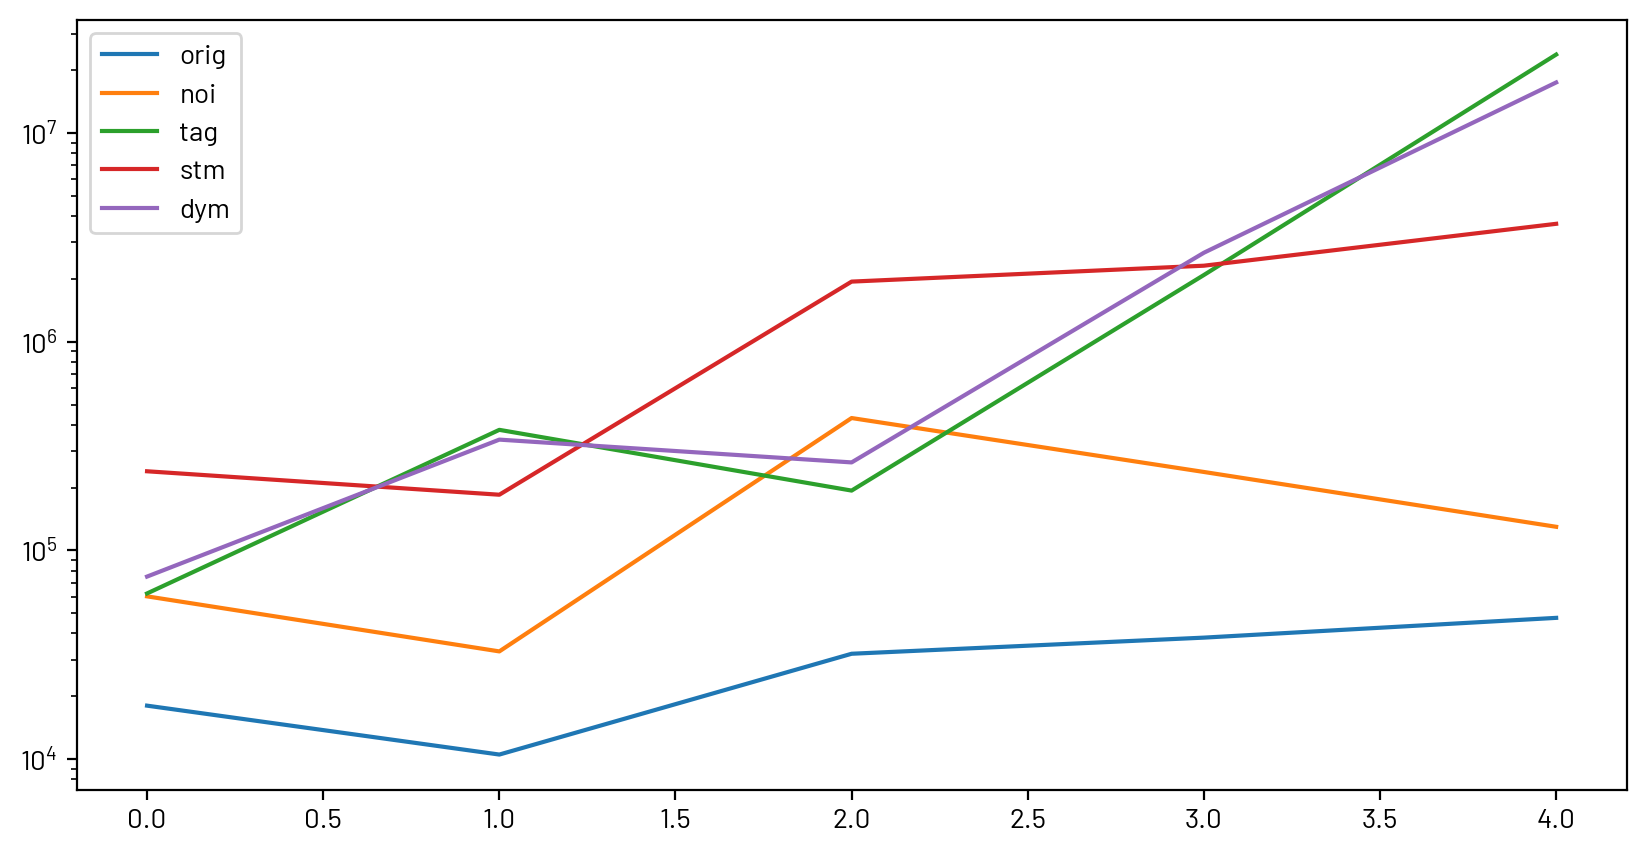

In [36]:
plt.figure(figsize=(10,5))
plt.plot(occs.values(),label="orig")
plt.plot(np.mean(list(etn_count.values()),axis=1),label="noi")
plt.plot(np.mean(list(tag_count.values()),axis=1),label="tag")
plt.plot(np.mean(list(stm_count.values()),axis=1),label="stm")
plt.plot(np.mean(list(dym_count.values()),axis=1),label="dym")
plt.yscale("log")
plt.legend()

In [37]:
file_name = "LH10"

ori = load_origin_graph(file_name)
etn_gen = load_ETNgen_graph(file_name)
dym_gen = load_dym_graph(file_name)
stm_gen = load_stm_graph(file_name)
tag_gen = load_tag_graph(file_name)

G_ori = nx.Graph()

for g in ori:
    for e in g.edges():
        G_ori.add_edge(e[0],e[1])
nx.density(G_ori),len(G_ori)

graph = G_ori

for k,subgraph in motifs.items():
    occurrences = count_subgraphs(graph, subgraph)
    print(k, occurrences)

../Competitors_generated_graphs/Dymond/Multiple_run/LH10/LH10_dym7.dat
../Competitors_generated_graphs/Dymond/Multiple_run/LH10/LH10_dym8.dat
../Competitors_generated_graphs/Dymond/Multiple_run/LH10/LH10_dym4.dat
../Competitors_generated_graphs/Dymond/Multiple_run/LH10/LH10_dym5.dat
../Competitors_generated_graphs/Dymond/Multiple_run/LH10/LH10_dym9.dat
../Competitors_generated_graphs/Dymond/Multiple_run/LH10/LH10_dym3.dat
../Competitors_generated_graphs/Dymond/Multiple_run/LH10/LH10_dym0.dat
../Competitors_generated_graphs/Dymond/Multiple_run/LH10/LH10_dym1.dat
../Competitors_generated_graphs/Dymond/Multiple_run/LH10/LH10_dym2.dat
../Competitors_generated_graphs/Dymond/Multiple_run/LH10/LH10_dym6.dat
../Competitors_generated_graphs/STM/Multiple_run/LH10/LH10_STM_7.dat
../Competitors_generated_graphs/STM/Multiple_run/LH10/LH10_STM_9.dat
../Competitors_generated_graphs/STM/Multiple_run/LH10/LH10_STM_5.dat
../Competitors_generated_graphs/STM/Multiple_run/LH10/LH10_STM_6.dat
../Competitors

In [39]:
len(ori[0].nodes())

75

In [46]:
#etn 
counts = {"s1":[],
         "s2":[],
         "s3":[],
         "s4":[],
         "s5":[]}

for G in etn_gen[0:2]:
    G_ori = nx.Graph()
    for g in G:
        for e in g.edges():
            G_ori.add_edge(e[0],e[1])    
    graph = G_ori
    print(+nx.density(G_ori))
    for k,subgraph in motifs.items():
        occurrences = count_subgraphs(graph, subgraph)
        counts[k].append(occurrences)
    print("done")
        
import json
with open("topology_results/etngen/Multiple_run/distributions/"+file_name+"/motifs.json", "w") as file:
    json.dump(counts, file,indent=2)
print(counts)

0.8212612612612613
done
0.8241441441441442
done
{'s1': [22185, 22521], 's2': [38652, 38719], 's3': [34619, 37571], 's4': [432017, 445920], 's5': [421033, 416501]}


In [47]:
# tag
counts = {"s1":[],
         "s2":[],
         "s3":[],
         "s4":[],
         "s5":[]}

for G in tag_gen[0:2]:
    G_ori = nx.Graph()

    for g in G:
        for e in g.edges():
            G_ori.add_edge(e[0],e[1])
    graph = G_ori
    print(+nx.density(G_ori))
    
    for k,subgraph in motifs.items():
        occurrences = count_subgraphs(graph, subgraph)
        counts[k].append(occurrences)
    print("done")
        
import json
with open("topology_results/taggen/Multiple_run/distributions/"+file_name+"/motifs.json", "w") as file:
    json.dump(counts, file,indent=2)
    

print(counts)

0.5502702702702703
done
0.6374774774774775
done


In [53]:
len(G_ori)

171

In [ ]:
# stm
counts = {"s1":[],
         "s2":[],
         "s3":[],
         "s4":[],
         "s5":[]}

for G in stm_gen[0:2]:
    G_ori = nx.Graph()

    for g in G:
        for e in g.edges():
            G_ori.add_edge(e[0],e[1])
    
    #graph = G_ori
    graph = G_ori.subgraph(list(G_ori.nodes())[0:75])
    print(nx.density(graph))
    
    for k,subgraph in motifs.items():
        occurrences = count_subgraphs(graph, subgraph)
        counts[k].append(occurrences)
    print("done")
        
import json
with open("topology_results/stmgen/Multiple_run/distributions/"+file_name+"/motifs.json", "w") as file:
    json.dump(counts, file,indent=2)

print(counts)   

In [62]:
# dym
counts = {"s1":[],
         "s2":[],
         "s3":[],
         "s4":[],
         "s5":[]}

for G in dym_gen[0:2]:
    G_ori = nx.Graph()

    for g in G:
        for e in g.edges():
            G_ori.add_edge(e[0],e[1])
            
    graph = G_ori
    print(+nx.density(G_ori))
    for k,subgraph in motifs.items():
        occurrences = count_subgraphs(graph, subgraph)
        counts[k].append(occurrences)
    print("done")
        
import json
with open("topology_results/dymgen/Multiple_run/distributions/"+file_name+"/motifs.json", "w") as file:
    json.dump(counts, file,indent=2)
print(counts)

0.6470588235294118
done
0.6631578947368421
done
{'s1': [289, 457], 's2': [271, 369], 's3': [48, 154], 's4': [684, 1258], 's5': [444, 586]}


In [63]:
etn_count = json.load(open("topology_results/etngen/Multiple_run/distributions/LH10/motifs.json"))
tag_count = json.load(open("topology_results/taggen/Multiple_run/distributions/LH10/motifs.json"))
stm_count = json.load(open("topology_results/stmgen/Multiple_run/distributions/LH10/motifs.json"))
dym_count = json.load(open("topology_results/dymgen/Multiple_run/distributions/LH10/motifs.json"))

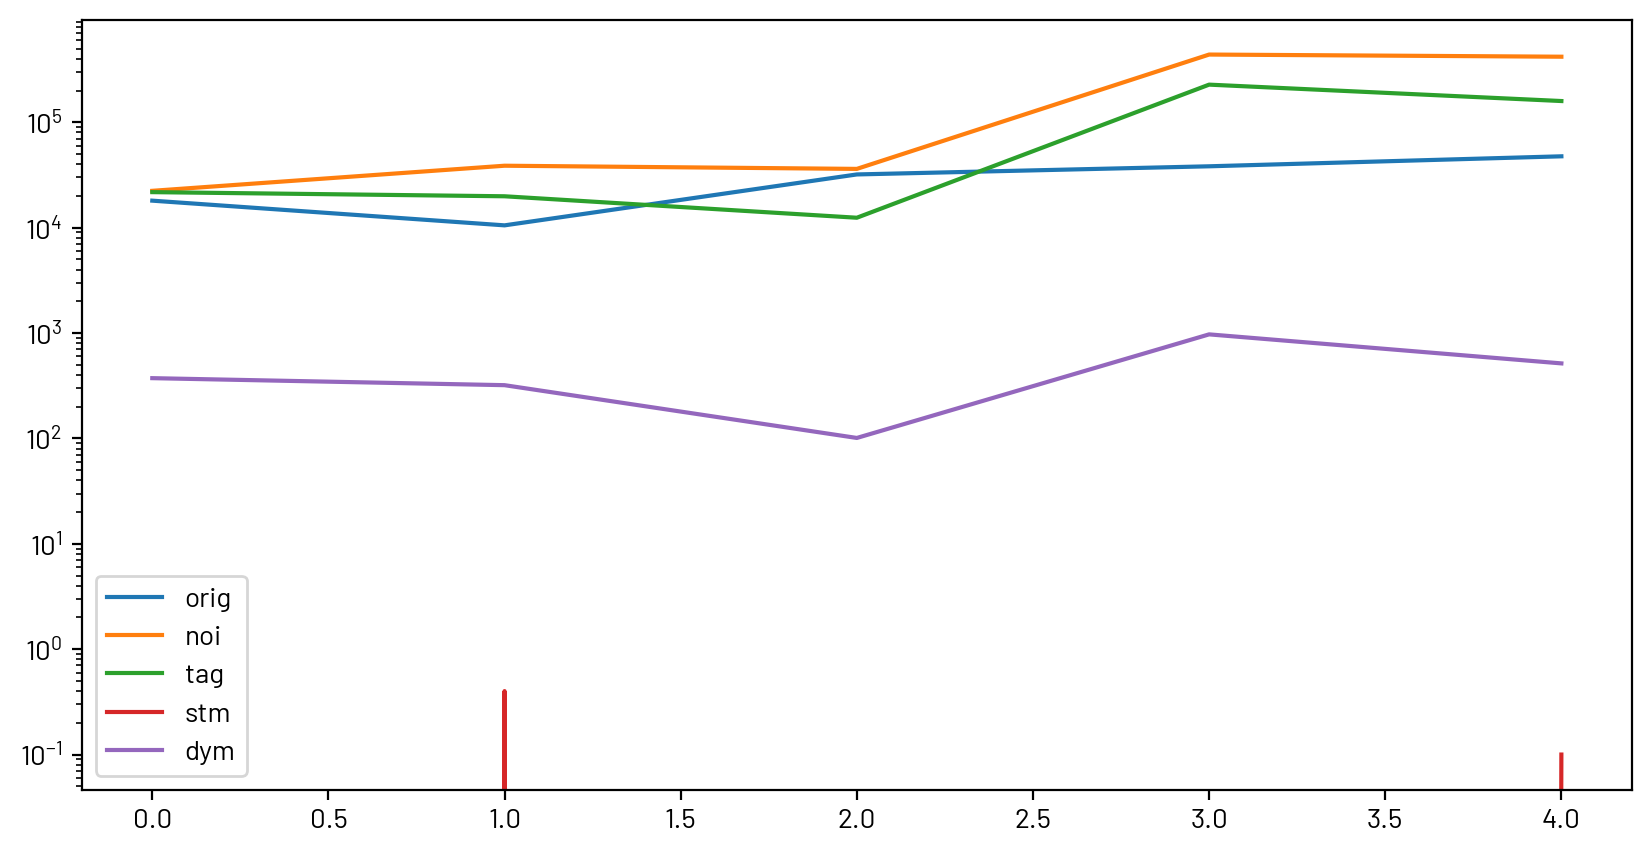

In [66]:
plt.figure(figsize=(10,5))
plt.plot(occs.values(),label="orig")
plt.plot(np.mean(list(etn_count.values()),axis=1),label="noi")
plt.plot(np.mean(list(tag_count.values()),axis=1),label="tag")
plt.plot(np.mean(list(stm_count.values()),axis=1),label="stm")
plt.plot(np.mean(list(dym_count.values()),axis=1),label="dym")
plt.yscale("log")
plt.legend()

In [67]:
file_name = "High_School11"

ori = load_origin_graph(file_name)
etn_gen = load_ETNgen_graph(file_name)
dym_gen = load_dym_graph(file_name)
stm_gen = load_stm_graph(file_name)
tag_gen = load_tag_graph(file_name)

G_ori = nx.Graph()

for g in ori:
    for e in g.edges():
        G_ori.add_edge(e[0],e[1])
nx.density(G_ori),len(G_ori)

graph = G_ori

for k,subgraph in motifs.items():
    occurrences = count_subgraphs(graph, subgraph)
    print(k, occurrences)

../Competitors_generated_graphs/Dymond/Multiple_run/High_School11/High_School11_dym1.dat
../Competitors_generated_graphs/Dymond/Multiple_run/High_School11/High_School11_dym7.dat
../Competitors_generated_graphs/Dymond/Multiple_run/High_School11/High_School11_dym8.dat
../Competitors_generated_graphs/Dymond/Multiple_run/High_School11/High_School11_dym6.dat
../Competitors_generated_graphs/Dymond/Multiple_run/High_School11/High_School11_dym3.dat
../Competitors_generated_graphs/Dymond/Multiple_run/High_School11/High_School11_dym0.dat
../Competitors_generated_graphs/Dymond/Multiple_run/High_School11/High_School11_dym9.dat
../Competitors_generated_graphs/Dymond/Multiple_run/High_School11/High_School11_dym5.dat
../Competitors_generated_graphs/Dymond/Multiple_run/High_School11/High_School11_dym4.dat
../Competitors_generated_graphs/Dymond/Multiple_run/High_School11/High_School11_dym2.dat
../Competitors_generated_graphs/STM/Multiple_run/High_School11/High_School11_STM_2.dat
../Competitors_generate

In [ ]:
#etn 
counts = {"s1":[],
         "s2":[],
         "s3":[],
         "s4":[],
         "s5":[]}

for G in etn_gen[0:2]:
    G_ori = nx.Graph()

    for g in G:
        for e in g.edges():
            G_ori.add_edge(e[0],e[1])    
    graph = G_ori
    for k,subgraph in motifs.items():
        occurrences = count_subgraphs(graph, subgraph)
        counts[k].append(occurrences)
    print("done")
        
import json
with open("topology_results/etngen/Multiple_run/distributions/"+file_name+"/motifs.json", "w") as file:
    json.dump(counts, file,indent=2)
print(counts)
    
    
# tag
counts = {"s1":[],
         "s2":[],
         "s3":[],
         "s4":[],
         "s5":[]}

for G in tag_gen[0:2]:
    G_ori = nx.Graph()

    for g in G:
        for e in g.edges():
            G_ori.add_edge(e[0],e[1])
    
    graph = G_ori
    for k,subgraph in motifs.items():
        occurrences = count_subgraphs(graph, subgraph)
        counts[k].append(occurrences)
    print("done")
        
import json
with open("topology_results/taggen/Multiple_run/distributions/"+file_name+"/motifs.json", "w") as file:
    json.dump(counts, file,indent=2)
    
print(counts)
# stm
counts = {"s1":[],
         "s2":[],
         "s3":[],
         "s4":[],
         "s5":[]}

for G in stm_gen[0:2]:
    G_ori = nx.Graph()

    for g in G:
        for e in g.edges():
            G_ori.add_edge(e[0],e[1])
    
    graph = G_ori
    for k,subgraph in motifs.items():
        occurrences = count_subgraphs(graph, subgraph)
        counts[k].append(occurrences)
        
    print("done")
import json
with open("topology_results/stmgen/Multiple_run/distributions/"+file_name+"/motifs.json", "w") as file:
    json.dump(counts, file,indent=2)

print(counts)    
    
# dym
counts = {"s1":[],
         "s2":[],
         "s3":[],
         "s4":[],
         "s5":[]}

for G in dym_gen[0:2]:
    G_ori = nx.Graph()

    for g in G:
        for e in g.edges():
            G_ori.add_edge(e[0],e[1])
            
    graph = G_ori
    for k,subgraph in motifs.items():
        occurrences = count_subgraphs(graph, subgraph)
        counts[k].append(occurrences)
    print("done")
        
import json
with open("topology_results/dymgen/Multiple_run/distributions/"+file_name+"/motifs.json", "w") as file:
    json.dump(counts, file,indent=2)
print(counts)

done
done
{'s1': [89778, 83262], 's2': [21636, 18224], 's3': [247029, 211983], 's4': [397513, 308498], 's5': [53057, 37803]}
done
done
{'s1': [47676, 64441], 's2': [249126, 23700], 's3': [13360, 86921], 's4': [1628070, 392124], 's5': [6456284, 117441]}


In [ ]:

def tmp(ax,orig,etn,stm,tag,dym,name,remove=False):
    ax.tick_params(bottom=False, right=False,left=False)
    ax.set_axisbelow(True)
    ax.yaxis.grid(True, color='#EEEEEE')
    ax.xaxis.grid(False)

    ax.spines['top'].set_color('#DDDDDD')
    ax.spines['right'].set_color('#DDDDDD')
    ax.spines['left'].set_color('#DDDDDD')
    ax.spines['bottom'].set_color('#DDDDDD')



    data = orig
    col = ORIGINAL_COLOR
    lw = 3
    violin_parts = ax.violinplot(data,positions=[1], showmeans=False, showmedians=False,showextrema=False)
    for pc in violin_parts['bodies']:
        pc.set_edgecolor(col)
        pc.set_facecolor(col)
        pc.set_linewidth(lw)

    data = etn
    col = ETN_COLOR
    violin_parts = ax.violinplot(data,positions=[1.75], showmeans=False, showmedians=False,showextrema=False)
    for pc in violin_parts['bodies']:
        pc.set_edgecolor(col)
        pc.set_facecolor(col)
        pc.set_linewidth(lw)

    data = tag
    col = TAG_COLOR
    violin_parts = ax.violinplot(data,positions=[2.5], showmeans=False, showmedians=False,showextrema=False)
    for pc in violin_parts['bodies']:
        pc.set_edgecolor(col)
        pc.set_facecolor(col)
        pc.set_linewidth(lw)


    data = stm
    col = STM_COLOR
    violin_parts = ax.violinplot(data,positions=[3.25], showmeans=False, showmedians=False,showextrema=False)
    for pc in violin_parts['bodies']:
        pc.set_facecolor(col)
        pc.set_edgecolor(col)
        pc.set_linewidth(lw)


    data = dym
    col = DYM_COLOR
    violin_parts = ax.violinplot(data,positions=[4], showmeans=False, showmedians=False,showextrema=False)
    for pc in violin_parts['bodies']:
        pc.set_facecolor(col)
        pc.set_edgecolor(col)
        pc.set_linewidth(lw)

  
    ax.set_yticks([1,0.1,0.01,0.001,0.0001])
    ax.set_yticklabels(["1",r"$10^{-1}$",r"$10^{-2}$",r"$10^{-3}$",r"$10^{-4}$"])

    ax.set_xticks([1,1.75,2.5,3.25,4])
    ax.set_xticklabels(["Original","ETN-Gen","TagGen","STM","Dymond"],rotation=0)
    ax.set_title(name)
    ax.set_yscale("log")
    ax.yaxis.grid(True, color='#EEEEEE')

In [ ]:
metric = dist_frequency_of_interactions
o,e,s,t,d = load_tmp("LH10","lh")
o1,e1,s1,t1,d1 = comp_metric(metric,o,e,s,t,d,False)

o,e,s,t,d = load_tmp("InVS13","in")
o2,e2,s2,t2,d2 = comp_metric(metric,o,e,s,t,d,False)

o,e,s,t,d = load_tmp("High_School11","hs")
o3,e3,s3,t3,d3 = comp_metric(metric,o,e,s,t,d,False)

In [ ]:
#plt.figure(figsize=(5,3))
#ax = plt.gca()
fig, ax = plt.subplots(1,3,figsize=(12,3),sharey=True)
fig.tight_layout(pad=0)


tmp(ax[0],o1,e1,s1,t1,d1,"Hospital")
tmp(ax[1],o2,e2,s2,t2,d2,"Workplace",True)
tmp(ax[2],o3,e3,s3,t3,d3,"High school",True)

fig.savefig("dist_nb_int.pdf", bbox_inches='tight')

In [ ]:

def tmp2(ax,orig,etn,stm,tag,dym,name,remove=False):
    ax.tick_params(bottom=False, right=False,left=False)
    ax.set_axisbelow(True)
    ax.yaxis.grid(True, color='#EEEEEE')
    ax.xaxis.grid(False)

    ax.spines['top'].set_color('#DDDDDD')
    ax.spines['right'].set_color('#DDDDDD')
    ax.spines['left'].set_color('#DDDDDD')
    ax.spines['bottom'].set_color('#DDDDDD')

    
    data = orig
    col = ORIGINAL_COLOR
    lw = 3
    violin_parts = ax.violinplot(data,positions=[1], showmeans=False, showmedians=False,showextrema=False)
    for pc in violin_parts['bodies']:
        pc.set_edgecolor(col)
        pc.set_facecolor(col)
        pc.set_linewidth(lw)

    data = etn
    col = ETN_COLOR
    violin_parts = ax.violinplot(data,positions=[1.75], showmeans=False, showmedians=False,showextrema=False)
    for pc in violin_parts['bodies']:
        pc.set_edgecolor(col)
        pc.set_facecolor(col)
        pc.set_linewidth(lw)

    data = tag
    col = TAG_COLOR
    violin_parts = ax.violinplot(data,positions=[3.25], showmeans=False, showmedians=False,showextrema=False)
    for pc in violin_parts['bodies']:
        pc.set_edgecolor(col)
        pc.set_facecolor(col)
        pc.set_linewidth(lw)


    data = stm
    col = STM_COLOR
    violin_parts = ax.violinplot(data,positions=[2.5], showmeans=False, showmedians=False,showextrema=False)
    for pc in violin_parts['bodies']:
        pc.set_facecolor(col)
        pc.set_edgecolor(col)
        pc.set_linewidth(lw)


    data = dym
    col = DYM_COLOR
    violin_parts = ax.violinplot(data,positions=[4], showmeans=False, showmedians=False,showextrema=False)
    for pc in violin_parts['bodies']:
        pc.set_facecolor(col)
        pc.set_edgecolor(col)
        pc.set_linewidth(lw)

  
    #ax.set_yticks([1,0.1,0.01,0.001,0.0001])
    #ax.set_yticklabels(["1",r"$10^{-1}$",r"$10^{-2}$",r"$10^{-3}$",r"$10^{-4}$"])

    ax.set_xticks([1,1.75,2.5,3.25,4])
    ax.set_xticklabels(["Original","ETN-Gen","STM","TagGen","Dymond"],rotation=0)
    ax.set_title(name)
    ax.set_yscale("log")
    ax.yaxis.grid(True, color='#EEEEEE')

In [ ]:
o,e,s,t,d = load_tmp("LH10","lh")

In [ ]:
metric = dist_number_of_individuals
o2,e2,s2,t2,d2 = comp_metric(metric,o,e,s,t,d,False)

fig, ax = plt.subplots(1,1,figsize=(6,3))
fig.tight_layout(pad=0)

tmp2(ax,o2,e2,s2,t2,d2,"Hospital")
fig.savefig("dist_nb_int_hospital.pdf", bbox_inches='tight')

In [ ]:
res_etn = []
c = 0
print(len(etn_gen))
for graphs_gen in etn_gen:
    c = c + 1 
    print(c,len(graphs_gen[0].nodes()))
    res = compute_all_metrics(orig_graphs,graphs_gen)
    res = np.array(res)
    res = res[:,0]
    print(res)
    res_etn.append(res)

In [ ]:
np.array(res_etn)

In [ ]:
file_name

In [ ]:
np.save("topology_results/taggen/Multiple_run/topology_res_10runs_"+file_name+".npy",res_etn)

# load topology results

In [ ]:

def load_topo_res(file_name):
    res_etn = np.load("topology_results/etngen/Multiple_run/topology_res_10runs_"+file_name+".npy")
    res_dym = np.load("topology_results/dymgen/Multiple_run/topology_res_10runs_"+file_name+".npy")
    res_stm = np.load("topology_results/stmgen/Multiple_run/topology_res_10runs_"+file_name+".npy")
    res_tag = np.load("topology_results/taggen/Multiple_run/topology_res_10runs_"+file_name+".npy")

    return [np.mean(res_etn,axis=0),np.std(res_etn,axis=0)],[np.mean(res_stm,axis=0),np.std(res_stm,axis=0)],[np.mean(res_tag,axis=0),np.std(res_tag,axis=0)],[np.mean(res_dym,axis=0),np.std(res_dym,axis=0)]


In [ ]:


line_width = 1.5


ORIGINAL_COLOR = '#474747' #dark grey
ETN_COLOR =  '#fb7041' #'#E5865E' # arancio
TAG_COLOR = '#96ccc8' # light blue
STM_COLOR = '#bad1f2' #8F2E27' # rosso
DYM_COLOR = '#559ca6' # teal


In [ ]:
labels = ["Density",
          "Global clustering \ncoefficient",
          "Average shortest\npath length",
          "Interacting\nindividuals",
          "New conversations",
          "Assortativity",
          "S-metric",        
          "Frequency of interactions",
          "Edge strength",
          "Duration of contacts"]

labels = labels

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


x1,x2,x3,x4 = load_topo_res("LH10")

x = np.arange(len(x1[0]))  # the label locations
width = 0.2  # the width of the bars


fig, ax = plt.subplots(3,1,figsize=(12,9))


ax[0].title.set_text("Hospital")
rects1 = ax[0].bar(x - width/2, x1[0], width, yerr=x1[1], label='ETN-gen',color=ETN_COLOR,ecolor=Error_bar_color)
rects2 = ax[0].bar(x + width/2, x2[0], width, yerr=x2[1],label='STM',color=STM_COLOR,ecolor=Error_bar_color)
rects3 = ax[0].bar(x + 0.3, x3[0], width, yerr=x3[1],label='TagGen',color=TAG_COLOR,ecolor=Error_bar_color)
rects4 = ax[0].bar(x + 0.3+0.2, x4[0], width, yerr=x4[1],label='Dymond',color=DYM_COLOR,ecolor=Error_bar_color)




x1,x2,x3,x4 = load_topo_res("InVS13")
ax[1].title.set_text("Workplace")
rects1 = ax[1].bar(x - width/2, x1[0], width, yerr=x1[1], label='ETN-gen',color=ETN_COLOR,ecolor=Error_bar_color)
rects2 = ax[1].bar(x + width/2, x2[0], width, yerr=x2[1],label='STM',color=STM_COLOR,ecolor=Error_bar_color)
rects3 = ax[1].bar(x + 0.3, x3[0], width, yerr=x3[1],label='TagGen',color=TAG_COLOR,ecolor=Error_bar_color)
rects4 = ax[1].bar(x + 0.3+0.2, x4[0], width, yerr=x4[1],label='Dymond',color=DYM_COLOR,ecolor=Error_bar_color)



x1,x2,x3,x4 = load_topo_res("High_School11")
ax[2].title.set_text("High school")
rects1 = ax[2].bar(x - width/2, x1[0], width, yerr=x1[1], label='ETN-gen',color=ETN_COLOR,ecolor=Error_bar_color)
rects2 = ax[2].bar(x + width/2, x2[0], width, yerr=x2[1],label='STM',color=STM_COLOR,ecolor=Error_bar_color)
rects3 = ax[2].bar(x + 0.3, x3[0], width, yerr=x3[1],label='TagGen',color=TAG_COLOR,ecolor=Error_bar_color)
rects4 = ax[2].bar(x + 0.3+0.2, x4[0], width, yerr=x4[1],label='Dymond',color=DYM_COLOR,ecolor=Error_bar_color)


ax[0].set_xticks(x)
ax[0].set_xticklabels([" "," "," "," "," "," "," "," "," "," "],rotation=45)
ax[0].set_ylim(0,1)
ax[1].set_xticks(x)
ax[1].set_xticklabels([" "," "," "," "," "," "," "," "," "," "],rotation=45)
ax[1].set_ylim(0,1)
ax[2].set_xticks(x)
ax[2].set_xticklabels(labels,rotation=45)
ax[2].set_ylim(0,1)
#ax[1].legend(loc='center left', bbox_to_anchor=(1, 0.5))

ax[0].tick_params(bottom=False, right=False,left=False)
ax[0].set_axisbelow(True)
ax[0].yaxis.grid(True, color='#EEEEEE')
ax[0].xaxis.grid(False)

ax[1].tick_params(bottom=False, right=False,left=False)
ax[1].set_axisbelow(True)
ax[1].yaxis.grid(True, color='#EEEEEE')
ax[1].xaxis.grid(False)

ax[2].tick_params(bottom=False, right=False,left=False)
ax[2].set_axisbelow(True)
ax[2].yaxis.grid(True, color='#EEEEEE')
ax[2].xaxis.grid(False)


ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].spines['left'].set_visible(False)
ax[0].spines['bottom'].set_color('#DDDDDD')



ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].spines['left'].set_visible(False)
ax[1].spines['bottom'].set_color('#DDDDDD')



ax[2].spines['top'].set_visible(False)
ax[2].spines['right'].set_visible(False)
ax[2].spines['left'].set_visible(False)
ax[2].spines['bottom'].set_color('#DDDDDD')

ax[2].legend(loc='upper right',ncol = 5,bbox_to_anchor=(0.38, -0.5))

fig.tight_layout()
#plt.savefig("topology_main.pdf", bbox_inches = 'tight')
plt.show()

In [ ]:
x1

In [ ]:
ORIGINAL_COLOR = '#474747' #dark grey
ETN_COLOR = '#E5865E' # arancio
STM_COLOR = '#95D1D3' # light blue
TAG_COLOR = '#8F2E27' # rosso
DYM_COLOR = '#558B8F' # teal



ORIGINAL_COLOR = '#474747' #dark grey
ETN_COLOR =  '#fb7041' #'#E5865E' # arancio
TAG_COLOR = '#96ccc8' # light blue
STM_COLOR = '#bad1f2' #8F2E27' # rosso
DYM_COLOR = '#559ca6' # teal


line_width = 1.5

In [ ]:

def load_topo_res_dist(file_name):
    res_etn = np.load("topology_results/etngen/Multiple_run/topology_res_10runs_"+file_name+".npy")
    res_dym = np.load("topology_results/dymgen/Multiple_run/topology_res_10runs_"+file_name+".npy")
    res_stm = np.load("topology_results/stmgen/Multiple_run/topology_res_10runs_"+file_name+".npy")
    res_tag = np.load("topology_results/taggen/Multiple_run/topology_res_10runs_"+file_name+".npy")
    return res_etn,res_dym,res_stm,res_tag




def flip_data(x1,x2,x3,x4,idx = [2, 5, 1, 8, 9, 6, 4, 3, 0, 7]):
    x1[0] = x1[0][idx]
    x1[1] = x1[1][idx]
    
    x2[0] = x2[0][idx]
    x2[1] = x2[1][idx]
    
    x3[0] = x3[0][idx]
    x3[1] = x3[1][idx]
    
    x4[0] = x4[0][idx]
    x4[1] = x4[1][idx]
    
    return x1,x2,x3,x4

In [ ]:
idx =[2, 5, 1, 8, 9, 6, 4, 3, 0, 7]
tmp= ["Density",
      "Global clustering \ncoefficient",
      "Average shortest\npath length",
      "Interacting\nindividuals",
      "New conversations",
      "Assortativity",
      "S-metric",        
      "Number of interactions",
      "Edge strength",
      "Duration of contacts"]


tmp = np.array(tmp)

In [ ]:
#labels

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np



#labels = list(np.flip(labels))
#labels = tmp
labels = tmp[idx]

x1,x2,x3,x4 = load_topo_res("LH10")
x1,x2,x3,x4 = flip_data(x1,x2,x3,x4)


x = np.arange(len(x1[0]))  # the label locations
width = 0.2  # the width of the bars


fig, ax = plt.subplots(1,3,figsize=(12,10))
fig.tight_layout(pad=-4)


error_bar_style = dict(ecolor=ORIGINAL_COLOR, alpha=0.8, lw=1.5, capsize=3, capthick=1)

ax[0].title.set_text("Hospital")
rects1 = ax[0].barh(x + 0.3, x1[0], width, xerr=x1[1], label='ETN-gen',color=ETN_COLOR, error_kw=error_bar_style)
rects2 = ax[0].barh(x + 0.1, x2[0], width, xerr=x2[1],label='STM',color=STM_COLOR, error_kw=error_bar_style)
rects3 = ax[0].barh(x - 0.1, x3[0], width, xerr=x3[1],label='TagGen',color=TAG_COLOR, error_kw=error_bar_style)
rects4 = ax[0].barh(x - 0.3, x4[0], width, xerr=x4[1],label='Dymond',color=DYM_COLOR,error_kw=error_bar_style)


x1,x2,x3,x4 = load_topo_res("InVS13")
x1,x2,x3,x4 = flip_data(x1,x2,x3,x4)
ax[1].title.set_text("Workplace")

rects1 = ax[1].barh(x + 0.3, x1[0], width, xerr=x1[1], label='ETN-gen',color=ETN_COLOR,error_kw=error_bar_style)
rects2 = ax[1].barh(x + 0.1, x2[0], width, xerr=x2[1],label='STM',color=STM_COLOR,error_kw=error_bar_style)
rects3 = ax[1].barh(x - 0.1, x3[0], width, xerr=x3[1],label='TagGen',color=TAG_COLOR,error_kw=error_bar_style)
rects4 = ax[1].barh(x - 0.3, x4[0], width, xerr=x4[1],label='Dymond',color=DYM_COLOR,error_kw=error_bar_style)



x1,x2,x3,x4 = load_topo_res("High_School11")
x1,x2,x3,x4 = flip_data(x1,x2,x3,x4)
ax[2].title.set_text("High school")
rects1 = ax[2].barh(x + 0.3, x1[0], width, xerr=x1[1], label='ETN-gen',color=ETN_COLOR,error_kw=error_bar_style)
rects2 = ax[2].barh(x + 0.1, x2[0], width, xerr=x2[1],label='STM',color=STM_COLOR,error_kw=error_bar_style)
rects3 = ax[2].barh(x - 0.1, x3[0], width, xerr=x3[1],label='TagGen',color=TAG_COLOR,error_kw=error_bar_style)
rects4 = ax[2].barh(x - 0.3, x4[0], width, xerr=x4[1],label='Dymond',color=DYM_COLOR,error_kw=error_bar_style)




ax[0].set_yticklabels(labels)
ax[0].set_yticks(x)
ax[0].set_xlim(0,1)

ax[1].set_yticks(x)
ax[1].set_yticklabels([" "," "," "," "," "," "," "," "," "," "],rotation=0)
ax[1].set_xlim(0,1)

ax[2].set_yticks(x)
ax[2].set_xlim(0,1)
ax[2].set_yticklabels([" "," "," "," "," "," "," "," "," "," "],rotation=0)

ax[2].set_xticks([0,0.33,0.66,1])
ax[2].set_xticklabels(["0.0","0.33","0.66","1.0"])
ax[1].set_xticks([0,0.33,0.66,1])
ax[1].set_xticklabels(["0.0","0.33","0.66","1.0"])
ax[0].set_xticks([0,0.33,0.66,1])
ax[0].set_xticklabels(["0.0","0.33","0.66","1.0"])


ax[0].tick_params(bottom=True, right=False,left=False)
ax[0].set_axisbelow(True)
ax[0].xaxis.grid(True, color='#b3b3b3')
ax[0].yaxis.grid(False)

ax[1].tick_params(bottom=True, right=False,left=False)
ax[1].set_axisbelow(True)
ax[1].xaxis.grid(True, color='#b3b3b3')
ax[1].yaxis.grid(False)

ax[2].tick_params(bottom=True, right=False,left=False)
ax[2].set_axisbelow(True)
ax[2].xaxis.grid(True, color='#b3b3b3')
ax[2].yaxis.grid(False)



ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].spines['left'].set_visible(False)
ax[0].spines['bottom'].set_visible(False)



ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].spines['left'].set_visible(False)
ax[1].spines['bottom'].set_visible(False)


ax[2].spines['top'].set_visible(False)
ax[2].spines['right'].set_visible(False)
ax[2].spines['left'].set_visible(False)
ax[2].spines['bottom'].set_visible(False)


ax[0].legend(loc='upper right',ncol = 5,bbox_to_anchor=(1, -0.05))

fig.tight_layout()
plt.savefig("topology_main_test_1_WithE_V8.pdf", bbox_inches = 'tight')
plt.show()